# ClusterAI 2020
# Ciencia de Datos - Ingeniería Industrial - UTN BA
# clase_05: Practica Regresion
### Elaborado por: Nicolás Aguirre

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Dataset
Fuente: http://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [3]:
df = pd.read_excel("../../datasets/concreto/Concrete_Data.xls")
print(df.shape)

(1030, 9)


In [4]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


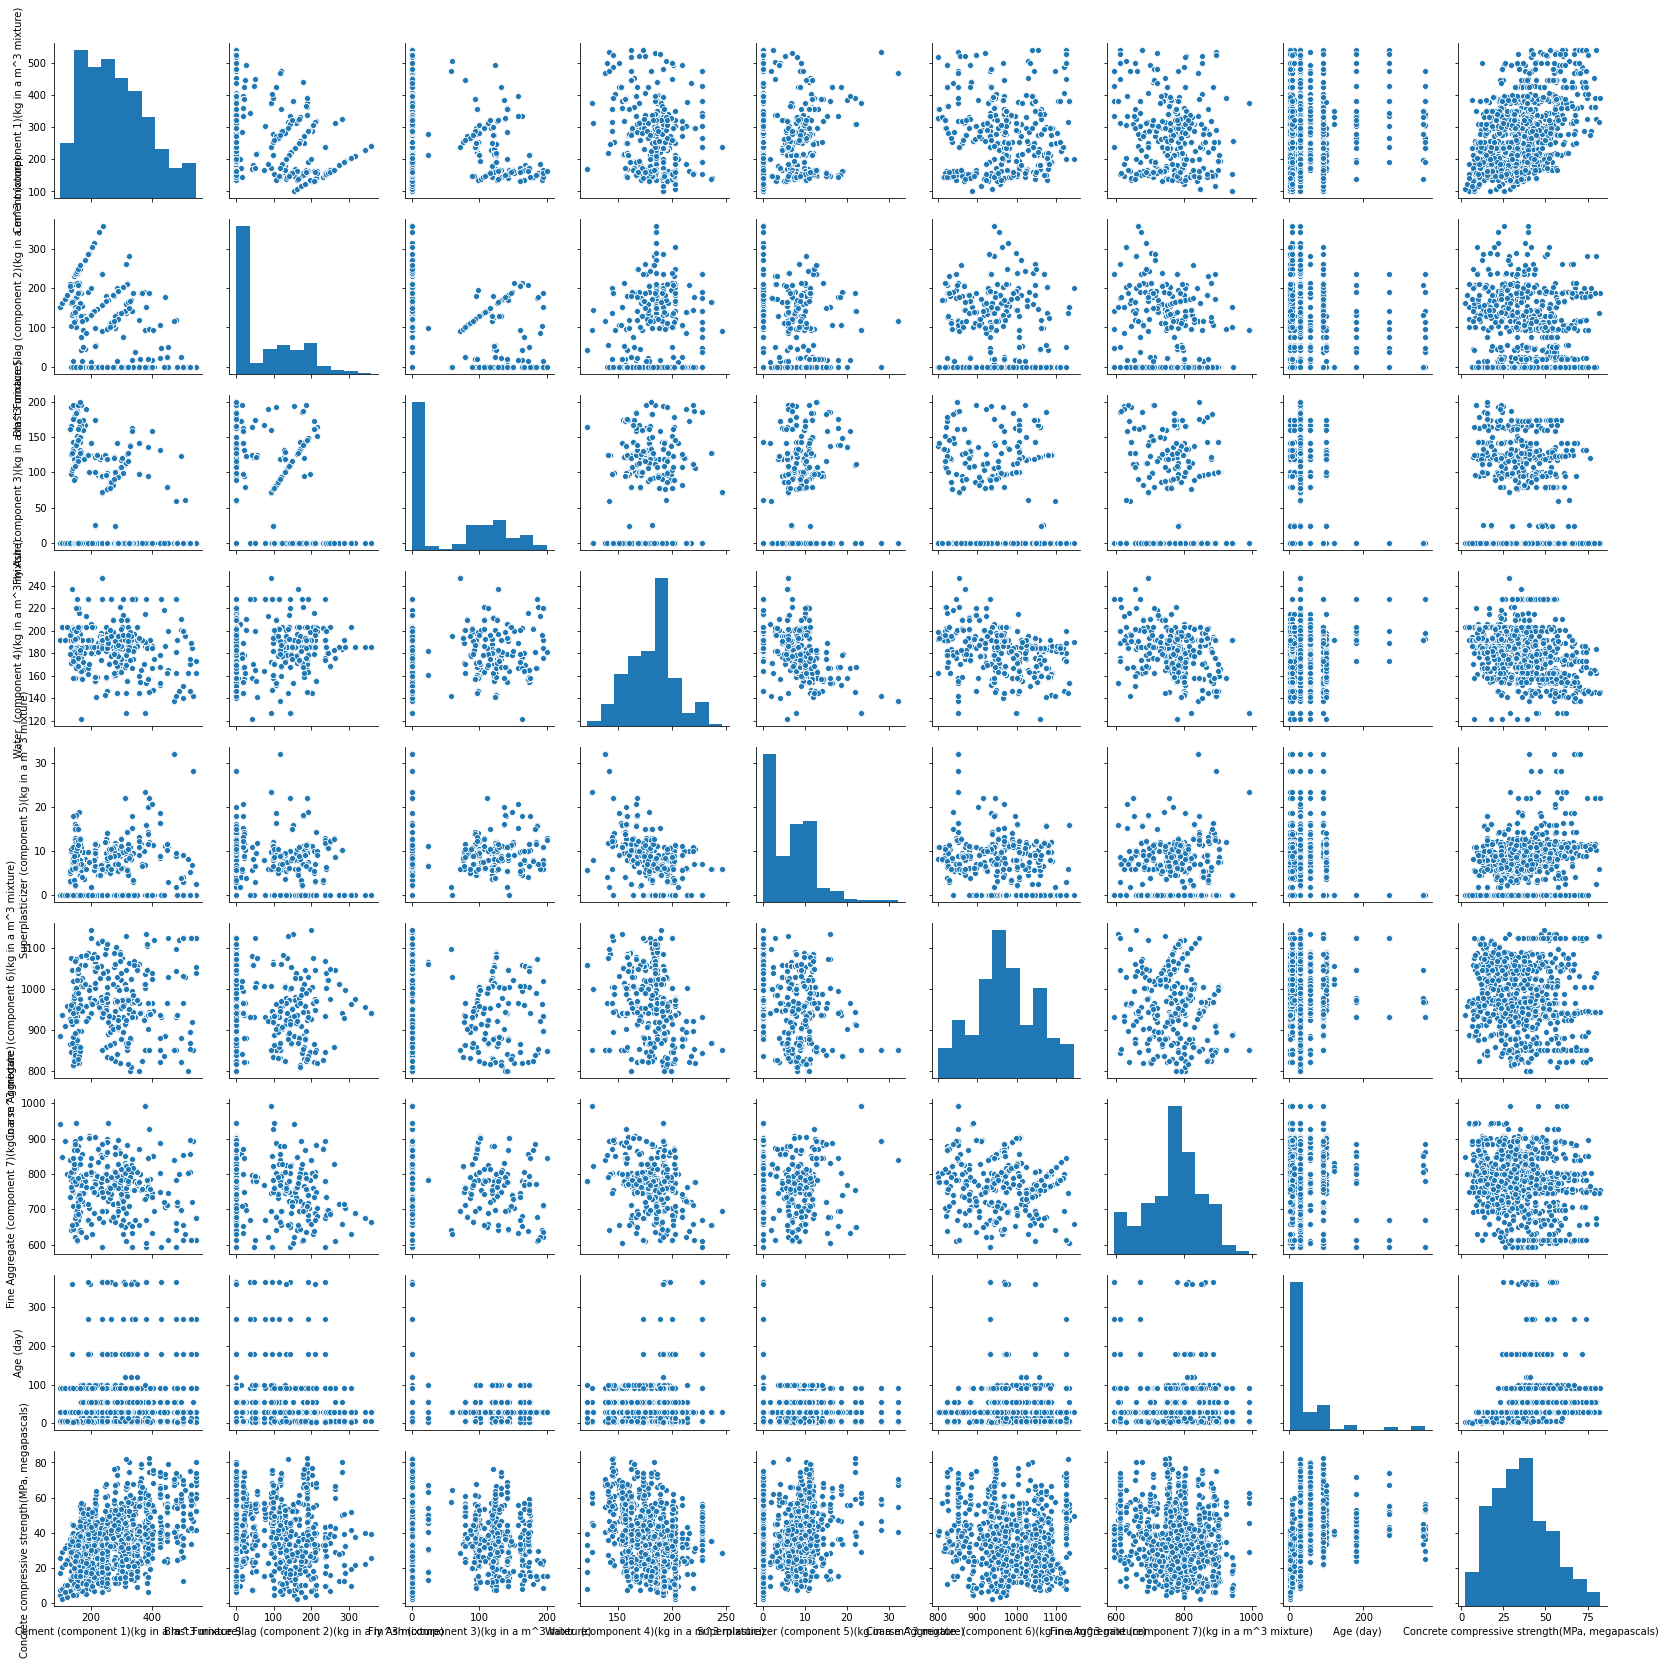

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x.shape,y.shape)

(1030, 8) (1030,)


# Polynomial Features

A nuestro set **X** vamos a incorporarle features polinomicas.

Dependiendo el grado polinomico que definamos, crearemos nuevas features que serán combinaciones de grado '0,1,2,3...n' de las features originales.

Veamos un ejemplo:

In [8]:
vector_ej = np.arange(1,10).reshape((3,3))
vector_ej

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
grad_poly = 3
poly_ej = PolynomialFeatures(grad_poly).fit_transform(vector_ej)
poly_ej

array([[  1.,   1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.,   1.,
          2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,   6.,  16.,  20.,  24.,  25.,  30.,  36.,  64.,
         80.,  96., 100., 120., 144., 125., 150., 180., 216.],
       [  1.,   7.,   8.,   9.,  49.,  56.,  63.,  64.,  72.,  81., 343.,
        392., 441., 448., 504., 567., 512., 576., 648., 729.]])

# Split Train and Test Set

In [10]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=1)

# Scaler

In [11]:
# Definimos el escalador 
scaler = MinMaxScaler() # Pueden probar con otros
# Fiteamos para los x_train
scaler = scaler.fit(x_train)

In [12]:
# Transformamos los x_train
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
x_train_scaled.shape

(772, 8)

In [16]:
# Transformamos los x_train
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 7
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [17]:
x_train_poly_scaled.shape

(772, 6435)

In [63]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

# Linear Regression

### Linear Features

In [19]:
#Definimos el estimador
est = LinearRegression()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 5
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [20]:
#Entrenamos
gs.fit(x_train_scaled, y_train)

/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'fit_intercept': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [21]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-106.31330298170593 



In [22]:
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.555472
MAE: 118.572042
MSE: 8.588129


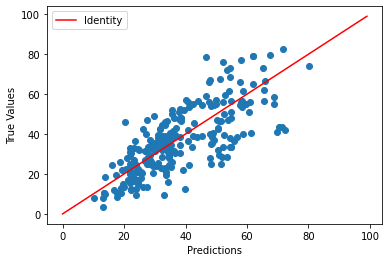

In [23]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mse:.6f}')
print(f'MSE: {linear_mae:.6f}')

In [64]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

### Polynomial Features

Ahora vamos a usar los mismos parametros, pero vamos a entrenar con el set de features polinomicas.
Este mismo proceso lo vamos a repetir para los otros estimadores

In [25]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False) 

{'fit_intercept': False} 

-436009519.46045595 



In [26]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: -7761481.201716
MAE: 2070273192.168169
MSE: 7744.953216


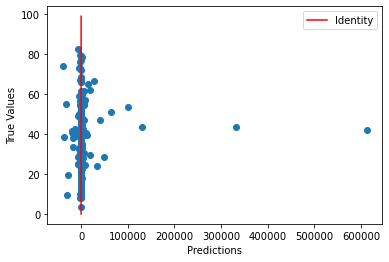

In [27]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

R2 score: -7761481.201716
MAE: 2070273192.168169
MSE: 7744.953216


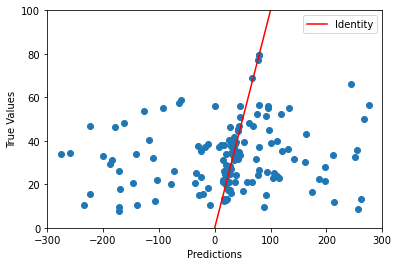

In [28]:
# Plot con 'zoom'
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,300),np.arange(0,300), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((-300,300))
plt.ylim((0,100))
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [65]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

## Ridge Regression

### Linear Features

In [30]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
est = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [31]:
# Entrenamos
gs.fit(x_train_scaled, y_train)

/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [32]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 0.2} 

-106.5078509471371 



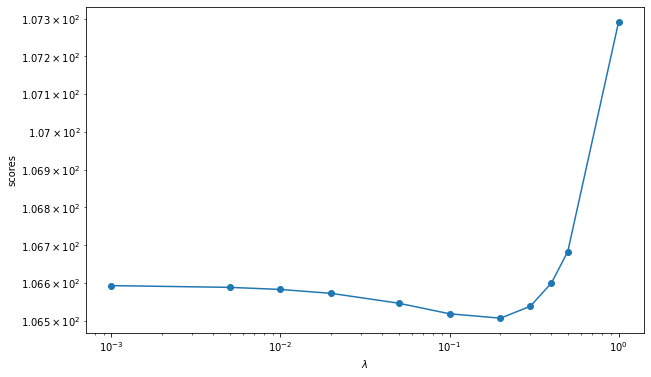

In [33]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

**Que nos dice esta grafica?**

In [34]:
#Predicciones + Metricas
ridge_prediction = gs.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

R2 score: 0.556384
MAE: 118.328684
MSE: 8.580916


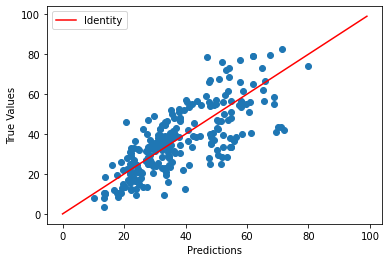

In [35]:
# Plots
plt.scatter(ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mse:.6f}')
print(f'MSE: {ridge_mae:.6f}')

**Comparemos Linear vs Ridge:**

**Porque estan dando asi?**

In [66]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

### Polynomial Features

In [37]:
#Definimos estimador
est = Ridge()
#Defini
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs.fit(x_train_poly_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 0.005} 

-35.640442631162195 



/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


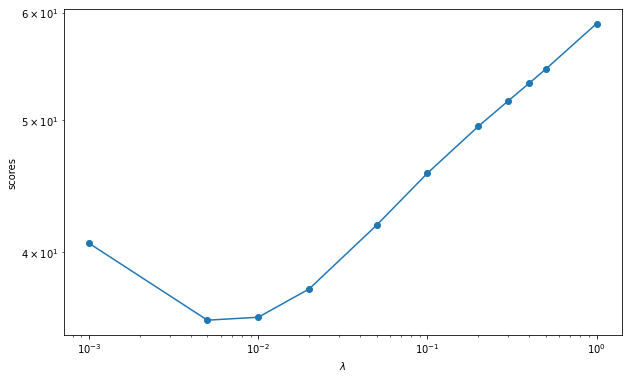

In [38]:
# Vamos a plotear nuestro parametro lambda vs el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

**Ahora nos muestra algo distinto?**

In [39]:
# Prediccion + Metricas
poly_ridge_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)

R2 score: 0.841243
MAE: 42.346273
MSE: 4.572459


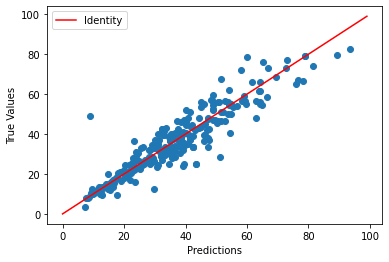

In [40]:
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mse:.6f}')
print(f'MSE: {poly_ridge_mae:.6f}')

In [67]:
# Guardamos
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)

# Support Vector Regression

### Linear Features

In [42]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [43]:
# Entrenamos
gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=3)]: Done 350 tasks      | elapsed:    9.9s
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed:   26.9s finished
/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=3,
             param_grid={'C': [1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [44]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=2000, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=1,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 2000, 'epsilon': 1, 'gamma': 1} 

-38.53230394465177 



In [45]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

R2 score: 0.832297
MAE: 44.732460
MSE: 4.452010


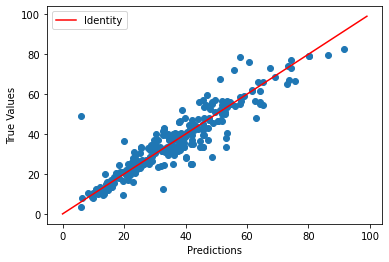

In [46]:
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mse:.6f}')
print(f'MSE: {svr_mae:.6f}')

In [68]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

## Polynomial Features

Recordemos que el set que incluye las features polinomicas ahora tiene mas de 1000 dimensiones. Esto hace "pesado" el calculo con SVR.

Y si ademas le sumamos que estamos haciendo un GridSearch, puede demorar varios minutos (incluso horas).

Por tal motivo, vamos a reducir nuestra grilla de busqueda unicamente por motivos de tiempo. Aunque puede probar dejarlo corriendo, sin cambiar el diccionario de parametros.

In [48]:
grad_poly = 4
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [49]:
x_test_poly_scaled.shape

(258, 495)

In [56]:
est = SVR(kernel='rbf',max_iter=25000)
parameters = {'C' : [500,1000,1500,2000],
              'epsilon' : [0.001, 0.01,1,100],
             'gamma':[0.01,0.1, 10,100]}

gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)
gs.fit(x_train_poly_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 156 tasks      | elapsed:   10.7s
[Parallel(n_jobs=5)]: Done 320 out of 320 | elapsed:   22.8s finished
/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/aguirre/anaconda3/envs/PhD/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=5,
             param_grid={'C': [500, 1000, 1500, 2000],
                         'epsilon': [0.001, 0.01, 1, 100],
                         'gamma': [0.01, 0.1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [57]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=1500, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.1,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1500, 'epsilon': 1, 'gamma': 0.1} 

-39.806614565366196 



In [58]:
# Prediccion + Metricas
poly_svr_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.818326
MAE: 48.459220
MSE: 4.586992


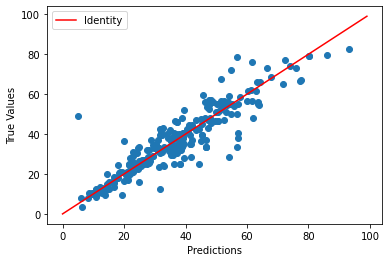

In [59]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mse:.6f}')
print(f'MSE: {poly_svr_mae:.6f}')

In [69]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)

# Resultados

In [70]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para acotar los decimales en pandas
display(results_df)

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.555,118.572,8.588
1,Linear,Poly,-7761481.202,2070273192.168,7744.953
2,Ridge,Lineal,0.556,118.329,8.581
3,Ridge,Poly,0.841,42.346,4.572
4,SVR,Linear,0.832,44.732,4.452
5,SVR,Poly,0.818,48.459,4.587


# Discusion

In [ ]:
# ESPACIO PARA DISCUTIR LOS RESULTADOS
# ESPACIO PARA DISCUTIR LOS RESULTADOS
# ESPACIO PARA DISCUTIR LOS RESULTADOS
# ESPACIO PARA DISCUTIR LOS RESULTADOS
# ESPACIO PARA DISCUTIR LOS RESULTADOS

# Competencia

Mayor R2 = **{ }**

Menor MSE = **{ }**

Menor MAE = **{ }**

# Ejercicio

**Para el caso Ridge Regression con features polinomicas:**

    1) Mostrar el valor que adopta el peso de cada feature en funcion de una lista de parametros lambda.

    2) Mostrar el MSE para cada valor de lambda.

***Que tipos de grafica esperariamos ver a medida que incrementamos lambda?***

In [ ]:
coefs = []

# Iterar parar valores de lambda
for alpha in #COMPLETAR#
    # Definir estimador
        #COMPLETAR#
        #COMPLETAR#
    
    # Entrenar
        #COMPLETAR#
        #COMPLETAR#
    
    # Guardar coeficientes
        #COMPLETAR# 
        # (Ayuda: los coeficientes se encuentran en 'ESTIMADOR.coef_'
        # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

plt.plot(#COMPLETAR#)
plt.show()